In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
df=pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


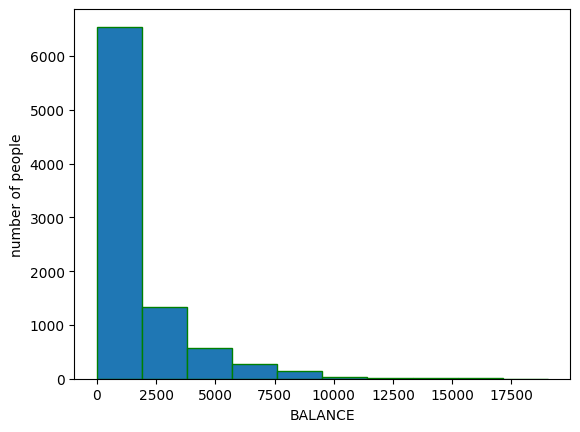

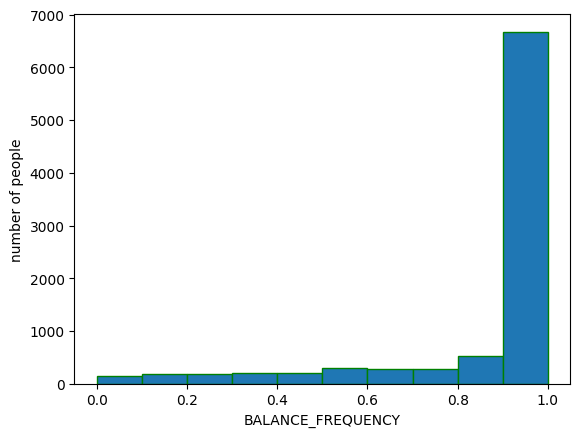

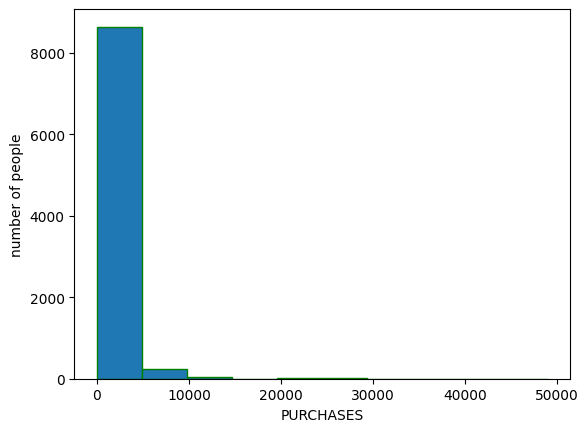

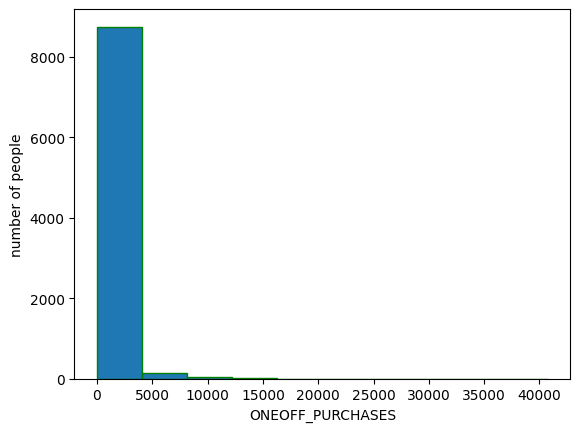

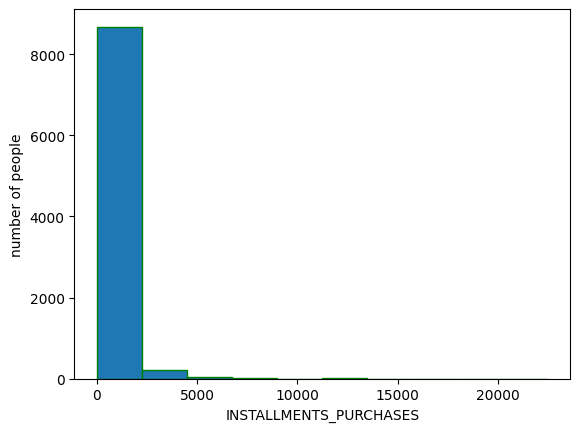

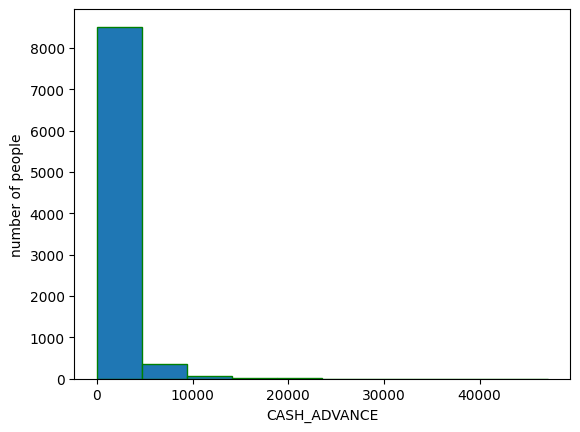

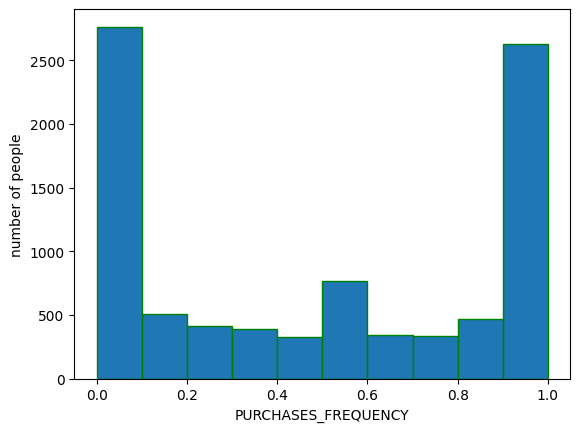

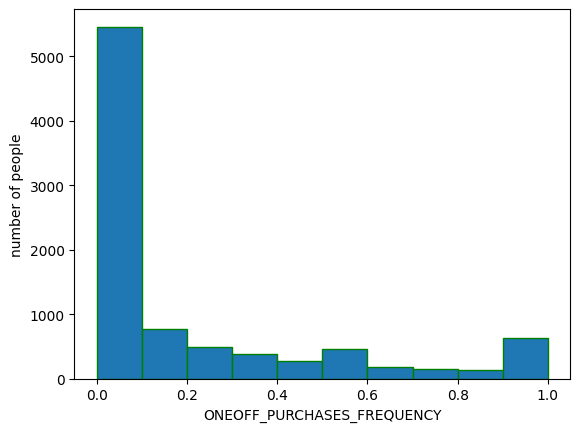

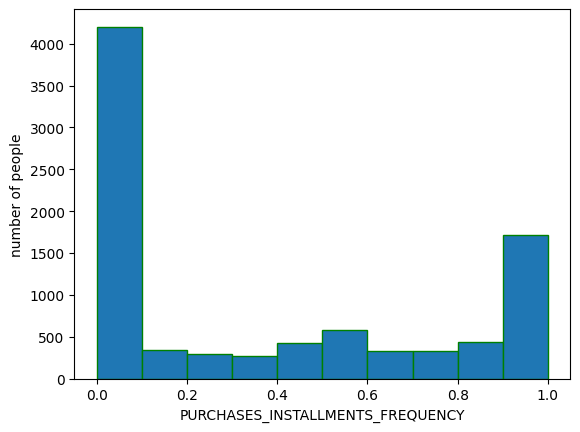

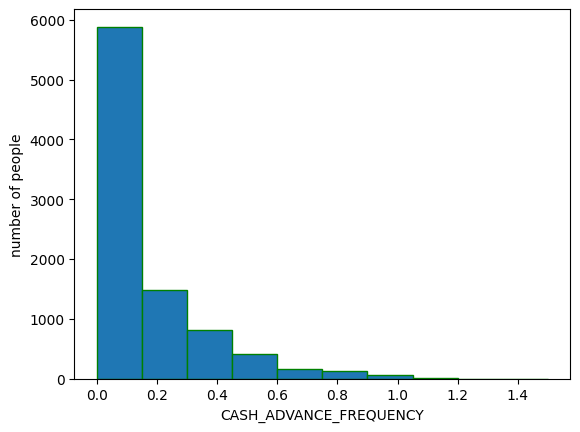

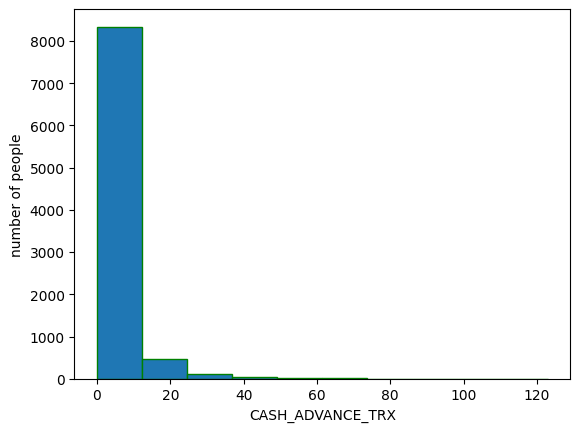

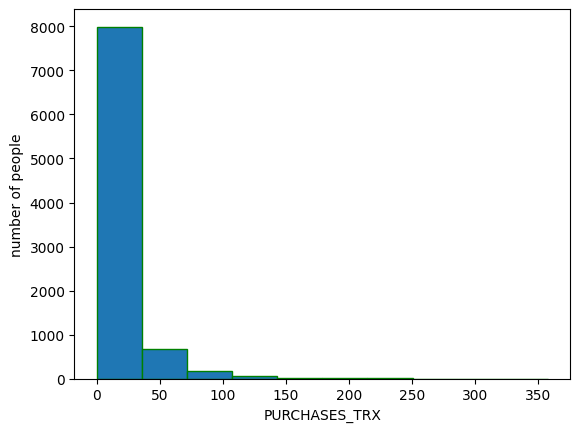

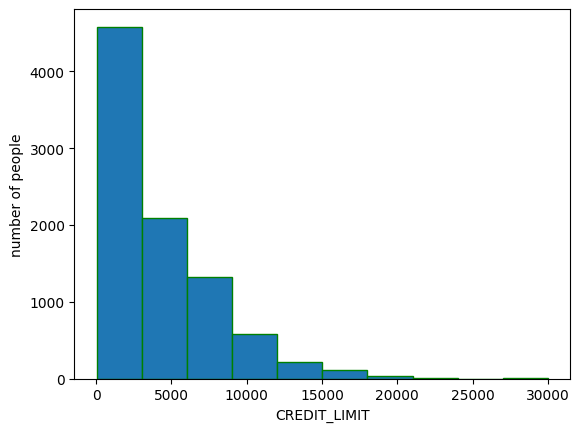

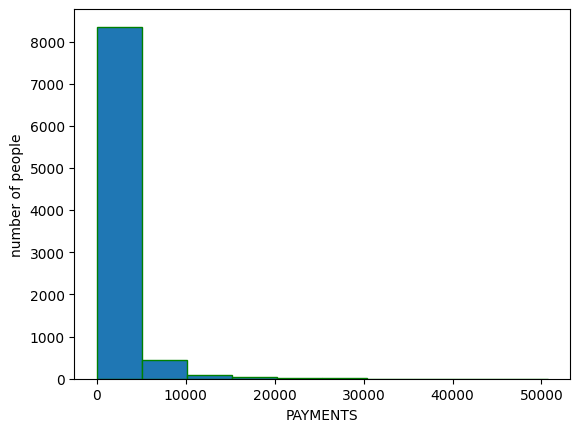

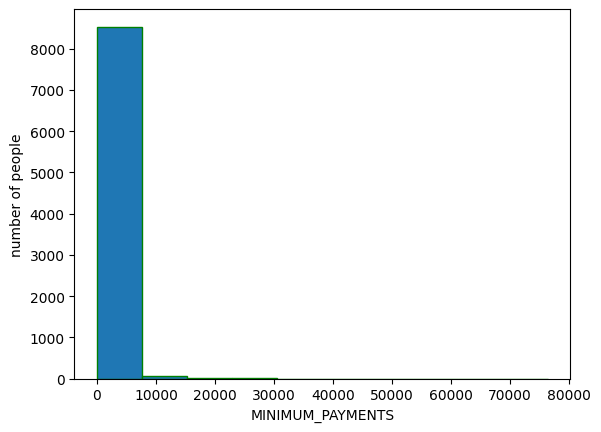

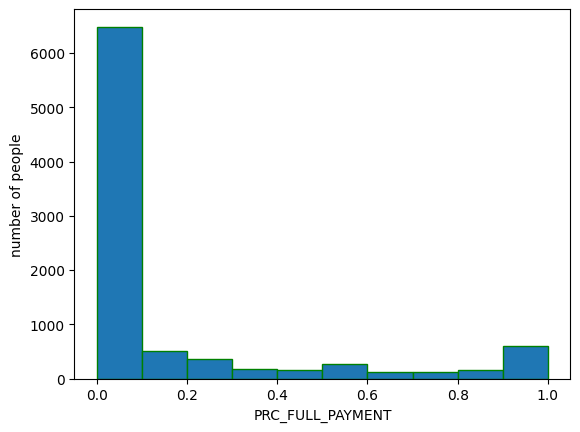

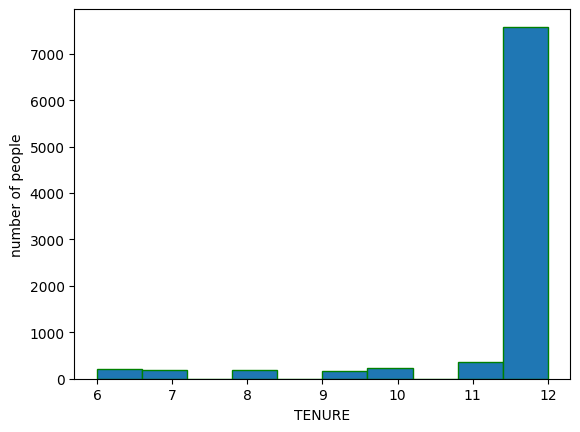

In [7]:

columns = df . columns . drop("CUST_ID")
for i in columns : 
    plt.hist(df[i], edgecolor='green')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

In [8]:
 df_show = []
columns = df . columns 
for i in columns : 
    types = df[i] . dtypes
    unique_data = df[i] . nunique()
                   
    NAN_value=df[i].isnull().sum() 
    value_count= df[i].isnull().count() 
    NAN_percentage= round(NAN_value/value_count*100,1)
        
    duplicated= df.duplicated().sum()    
    df_show . append ([i , types , unique_data , NAN_value, NAN_percentage,duplicated])
        
df_info = pd . DataFrame (df_show)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'NAN value', "NAN_percentage","duplicated"]




df_info.style.highlight_max(color = 'green', axis = 0)

,name of column,types,unique_data,NAN value,NAN_percentage,duplicated
0,CUST_ID,object,8950,0,0.000000,0
1,BALANCE,float64,8871,0,0.000000,0
2,BALANCE_FREQUENCY,float64,43,0,0.000000,0
3,PURCHASES,float64,6203,0,0.000000,0
4,ONEOFF_PURCHASES,float64,4014,0,0.000000,0
5,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000,0
6,CASH_ADVANCE,float64,4323,0,0.000000,0
7,PURCHASES_FREQUENCY,float64,47,0,0.000000,0
8,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000,0


In [9]:
df.drop('CUST_ID', axis=1, inplace = True)


# IQR to find outliers

In [10]:

numeric_df = df.select_dtypes(include='number')

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Count the number of outliers in each column
count_out = numeric_df[(numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))].count()

# Create a DataFrame to display the count of outliers
df_count_out = pd.DataFrame(count_out, columns=['count_out'])

# Print the DataFrame showing the count of outliers for each column
print(df_count_out)


                                  count_out
BALANCE                                 695
BALANCE_FREQUENCY                      1493
PURCHASES                               808
ONEOFF_PURCHASES                       1013
INSTALLMENTS_PURCHASES                  867
CASH_ADVANCE                           1030
PURCHASES_FREQUENCY                       0
ONEOFF_PURCHASES_FREQUENCY              782
PURCHASES_INSTALLMENTS_FREQUENCY          0
CASH_ADVANCE_FREQUENCY                  525
CASH_ADVANCE_TRX                        804
PURCHASES_TRX                           766
CREDIT_LIMIT                            248
PAYMENTS                                808
MINIMUM_PAYMENTS                        841
PRC_FULL_PAYMENT                       1474
TENURE                                 1366


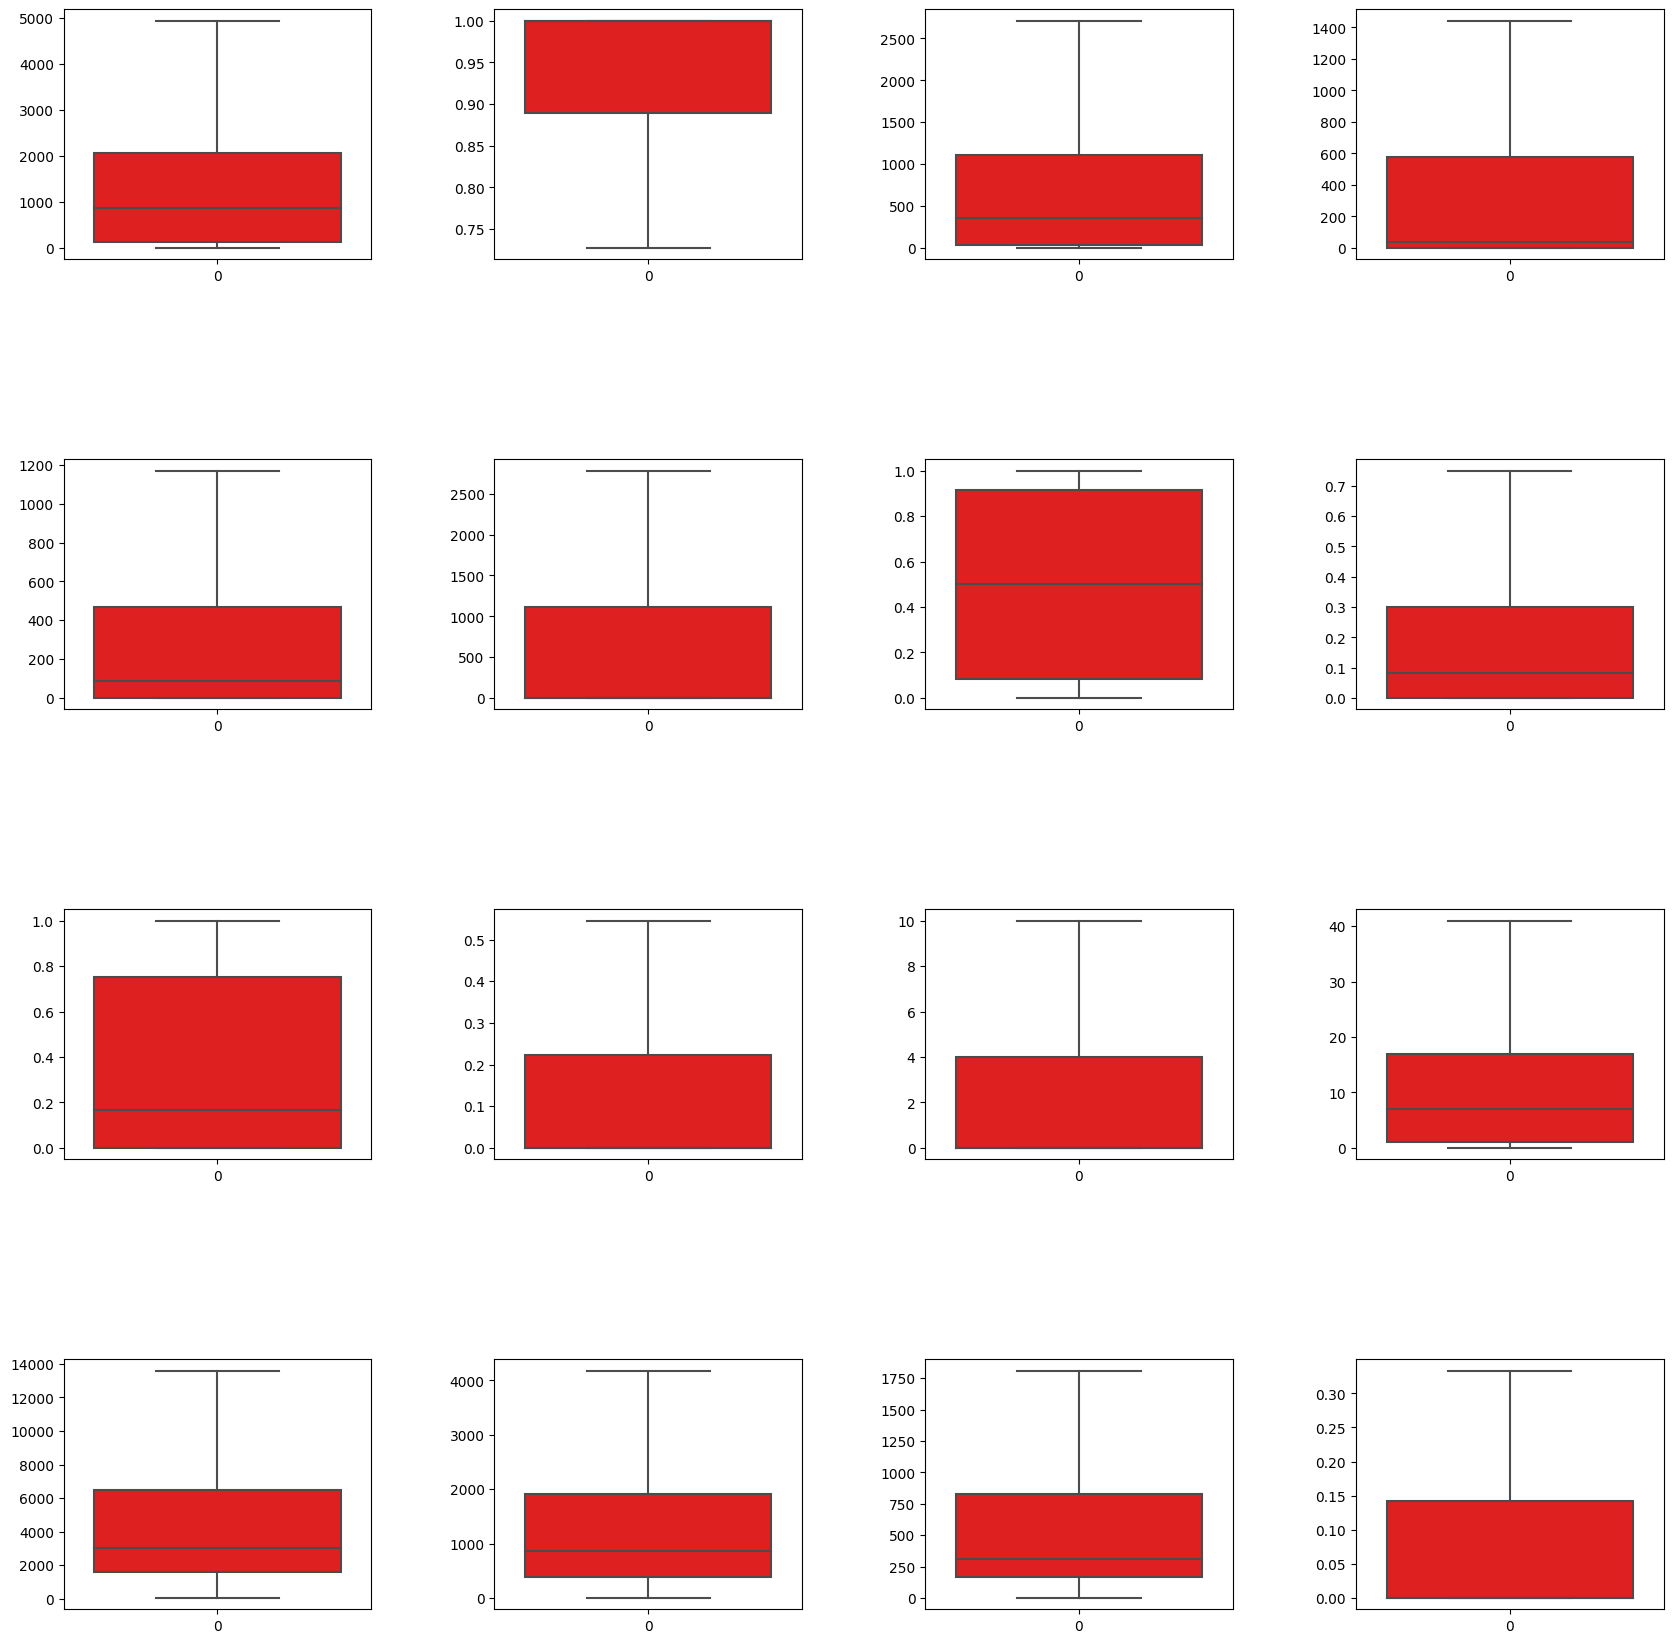

In [11]:
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]],showfliers = False ,color='red')

# missing values

In [12]:
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [13]:
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)


In [14]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


In [15]:
#for shape
print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
#for display rows 
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])]

Shape: (2364, 2)


,PAYMENTS,MINIMUM_PAYMENTS
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490
...,...,...
8932,106.138603,337.294767
8938,72.530037,110.950798
8946,81.270775,82.418369
8947,52.549959,55.755628


In [16]:
minpay = df['MINIMUM_PAYMENTS'].copy() # make a copy of MINIMUM_PAYMENTS
payments_mean = np.mean(df['PAYMENTS']) # take the mean value of PAYMENTS

i = 0
minpay.loc[(df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna())] = 0
minpay.loc[(df['PAYMENTS'] > 0) & (df['PAYMENTS'] < payments_mean) & (df['MINIMUM_PAYMENTS'].isna())] = df['PAYMENTS']
minpay.loc[df['MINIMUM_PAYMENTS'].isna()] = payments_mean

    

print(f'Missing (after): {minpay.isna().sum().sum()}')

df['MINIMUM_PAYMENTS'] = minpay.copy()

Missing (after): 0


# Dropping some of outliers 

In [17]:

df = df[(df['BALANCE']<10000)]
df = df[(df['PURCHASES']<=30000)]
df = df[(df['ONEOFF_PURCHASES']<15000)]
df = df[(df['INSTALLMENTS_PURCHASES']<15000)]
df = df[(df['CASH_ADVANCE']<20000)]
df = df[(df['MINIMUM_PAYMENTS']<30000)]

In [18]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1733.336511,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8847,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,1733.336511,0.000000,6
8848,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8849,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


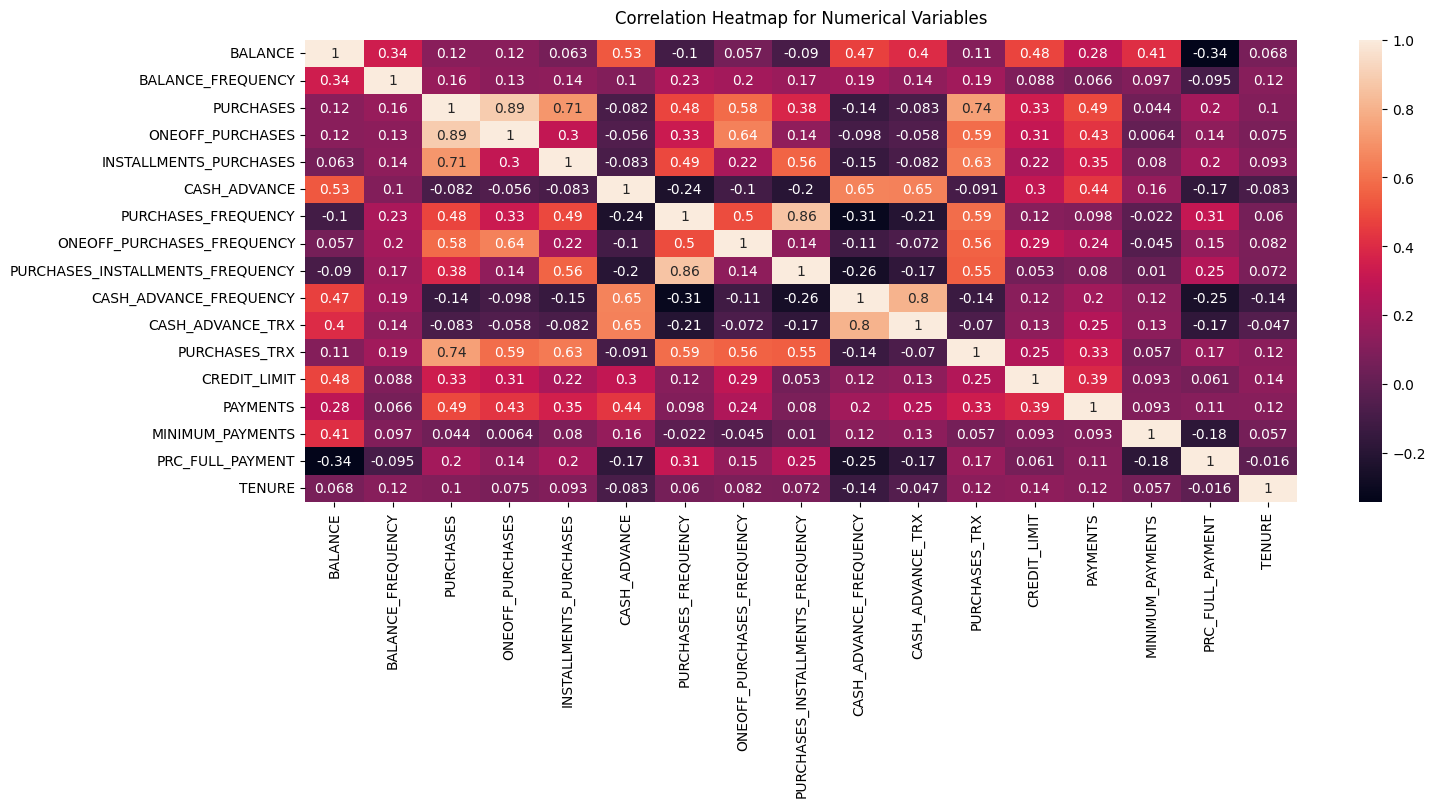

In [19]:
#heat map to find extreme positive and negative correlations
plt.figure(figsize=(16, 6))
sns.heatmap(df.loc[:, (df.columns != 'CUST_ID')].corr(), annot=True)
plt.title('Correlation Heatmap for Numerical Variables', fontdict={'fontsize':12}, pad=12);

#  standardize the data.

In [20]:
df_model=df.copy()

scaler= StandardScaler()
df_Standardize=pd.DataFrame(scaler.fit_transform(df_model), columns = df_model.columns)
df_Standardize

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.775740,-0.244028,-0.521303,-0.454939,-0.379505,-0.498587,-0.803549,-0.676003,-0.704359,-0.674186,-0.480468,-0.530434,-0.976123,-0.593449,-0.402397,-0.526723,0.362114
1,0.939236,0.138487,-0.581407,-0.454939,-0.502856,2.932716,-1.219175,-0.676003,-0.914365,0.587315,0.123298,-0.617193,0.755364,1.037402,0.156840,0.232621,0.362114
2,0.555555,0.521001,-0.094299,0.203474,-0.502856,-0.498587,1.274576,2.696804,-0.914365,-0.674186,-0.480468,-0.096639,0.899654,-0.417764,-0.109973,-0.526723,0.362114
3,0.106151,-1.009056,0.362984,0.821573,-0.502856,-0.388991,-1.011364,-0.394937,-0.914365,-0.253687,-0.329527,-0.573813,0.899654,-0.677810,0.553110,-0.526723,0.362114
4,-0.354361,0.521001,-0.571326,-0.441314,-0.502856,-0.498587,-1.011364,-0.394937,-0.914365,-0.674186,-0.480468,-0.573813,-0.918407,-0.394242,-0.339280,-0.526723,0.362114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,-0.782470,0.521001,-0.397997,-0.454939,-0.126442,-0.498587,1.274576,-0.676003,1.185702,-0.674186,-0.480468,-0.356916,-0.976123,-0.541700,-0.456726,1.181803,-4.105918
8847,-0.787521,0.521001,-0.392402,-0.454939,-0.114961,-0.498587,1.274576,-0.676003,1.185702,-0.674186,-0.480468,-0.356916,-0.976123,-0.562490,0.553110,-0.526723,-4.105918
8848,-0.785234,-0.180277,-0.490433,-0.454939,-0.316149,-0.498587,0.858950,-0.676003,0.765690,-0.674186,-0.480468,-0.400296,-0.976123,-0.643836,-0.436623,0.327540,-4.105918
8849,-0.790626,-0.180277,-0.581407,-0.454939,-0.502856,-0.479117,-1.219175,-0.676003,-0.914365,0.166817,-0.178585,-0.617193,-1.120414,-0.655842,-0.452608,0.327540,-4.105918


# PCA 

In [21]:
pca = PCA(n_components = 2)
Principal_2 = pca.fit_transform(df_Standardize)

#2D
pca2 = pd.DataFrame(data = Principal_2, columns = ['pca1', 'pca2'])
pca2.head()

,pca1,pca2
0,-1.613011,-1.425874
1,-1.596897,2.587739
2,1.092150,-0.121964
3,-0.755277,0.001546
4,-1.589599,-0.982966


# kmeans 

In [22]:

kmeans1 = KMeans(n_clusters=3,random_state=1)  # Adjust the number of clusters as needed
labels1 = kmeans1.fit_predict(pca2)

# Combine PCA results and cluster labels
df_pca2 = pd.concat([pca2, pd.DataFrame({'cluster': labels1})], axis=1)
print(df_pca2.head())


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       pca1      pca2  cluster
0 -1.613011 -1.425874        0
1 -1.596897  2.587739        2
2  1.092150 -0.121964        0
3 -0.755277  0.001546        0
4 -1.589599 -0.982966        0


In [23]:
# Assuming `kmeans` is your fitted KMeans object
labels1 = pd.Series(kmeans1.labels_)

# Print the count of each cluster label
print(labels1.value_counts())


0    5859
2    1638
1    1354
Name: count, dtype: int64


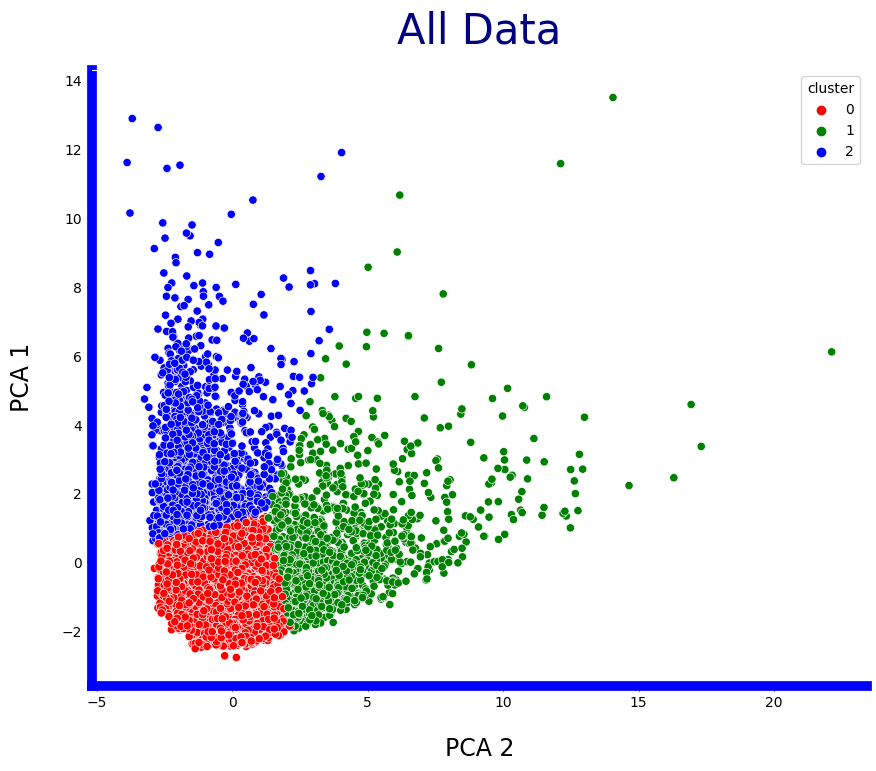

In [24]:
plt.figure(figsize = (10,8))

ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pca2,palette=['red','green','blue'])
plt.title('All Data', fontsize = 30, color='navy', y=1.03)
plt.xlabel("PCA 2", labelpad=20 , size=17)
plt.ylabel("PCA 1", labelpad=20 , size=17)

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_linewidth(7)
ax.spines['bottom'].set_linewidth(7)
ax.spines['left'].set_color('blue')

plt.show();


# elbow method

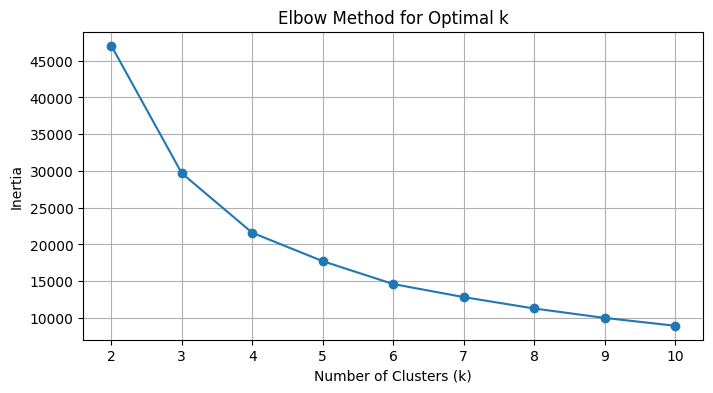

In [25]:
kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(pca2)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4,random_state=2)  # Adjust the number of clusters as needed
labels2 = kmeans.fit_predict(pca2)

# Combine PCA results and cluster labels
df_pca3 = pd.concat([pca2, pd.DataFrame({'cluster': labels2})], axis=1)
print(df_pca3.head())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       pca1      pca2  cluster
0 -1.613011 -1.425874        0
1 -1.596897  2.587739        2
2  1.092150 -0.121964        3
3 -0.755277  0.001546        0
4 -1.589599 -0.982966        0


In [27]:
# Assuming `kmeans` is your fitted KMeans object
labels2 = pd.Series(kmeans.labels_)

# Print the count of each cluster label
print(labels2.value_counts())

0    3750
3    3171
2    1282
1     648
Name: count, dtype: int64


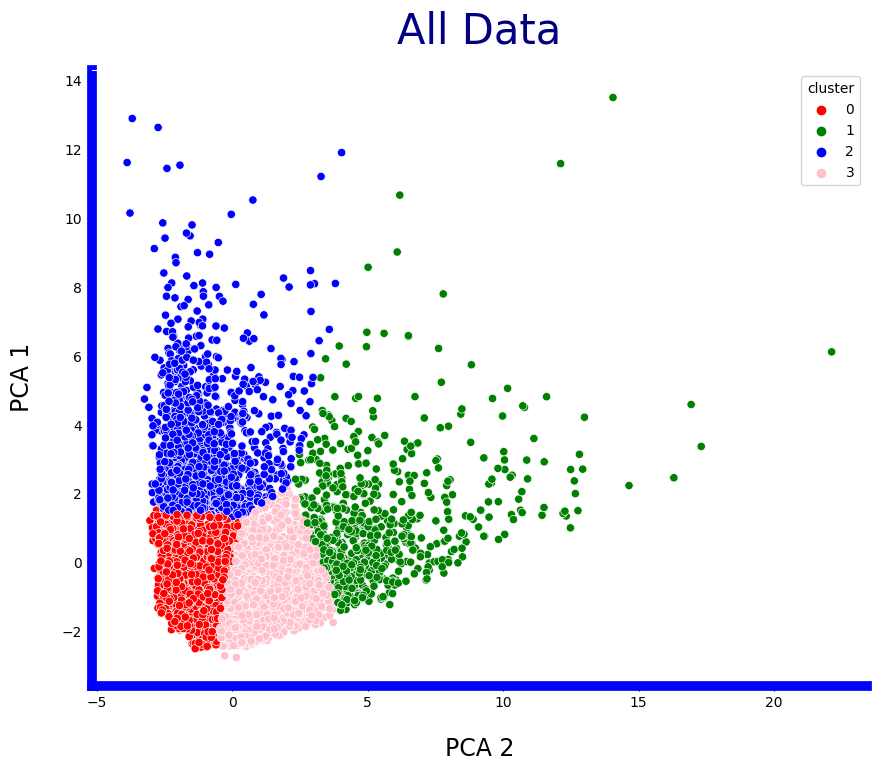

In [28]:
plt.figure(figsize = (10,8))

ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pca3,palette=['red','green','blue','pink'])
plt.title('All Data', fontsize = 30, color='navy', y=1.03)
plt.xlabel("PCA 2", labelpad=20 , size=17)
plt.ylabel("PCA 1", labelpad=20 , size=17)

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_linewidth(7)
ax.spines['bottom'].set_linewidth(7)
ax.spines['left'].set_color('blue')

plt.show();


# predict any points 

In [29]:
# Example test point for PCA-transformed data with 2 components
t = np.array([-1.589603 ,-0.982963 ])

# Reshape the array to be 2D
t = t.reshape(1, -1)

# Predict the cluster for the test point
cluster_label = kmeans.predict(t)
print(cluster_label)

[0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# use silhouette_score rather than elbow method 

In [30]:
silhouette_score(df_pca3,kmeans.labels_)

0.5778744740589734

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

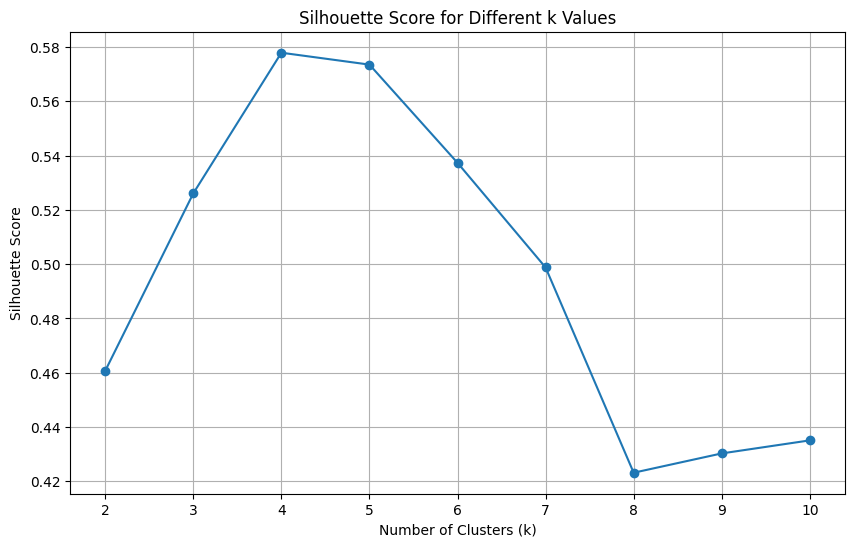

In [31]:
k_values=range(2,11)
silhouette_scores = []
for k in k_values:
    kmeans=KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca3)
    
    score = silhouette_score(df_pca3, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#best k is 4 or 5

* best k is 4 after that is 5

In [32]:
kmeans = KMeans(n_clusters=5,random_state=2)  # Adjust the number of clusters as needed
labels3 = kmeans.fit_predict(pca2)

# Combine PCA results and cluster labels
df_pca3 = pd.concat([pca2, pd.DataFrame({'cluster': labels3})], axis=1)
print(df_pca3.head())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       pca1      pca2  cluster
0 -1.613011 -1.425874        4
1 -1.596897  2.587739        1
2  1.092150 -0.121964        0
3 -0.755277  0.001546        4
4 -1.589599 -0.982966        4


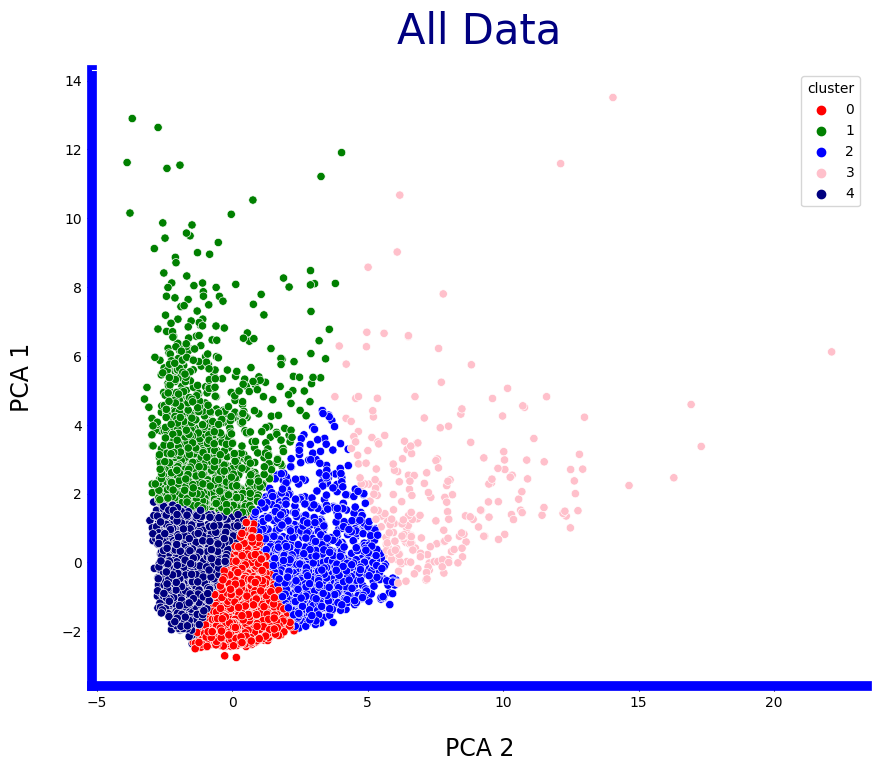

In [33]:
plt.figure(figsize = (10,8))

ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pca3,palette=['red','green','blue','pink','navy'])
plt.title('All Data', fontsize = 30, color='navy', y=1.03)
plt.xlabel("PCA 2", labelpad=20 , size=17)
plt.ylabel("PCA 1", labelpad=20 , size=17)

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_linewidth(7)
ax.spines['bottom'].set_linewidth(7)
ax.spines['left'].set_color('blue')

plt.show();

# using DBSCAN 

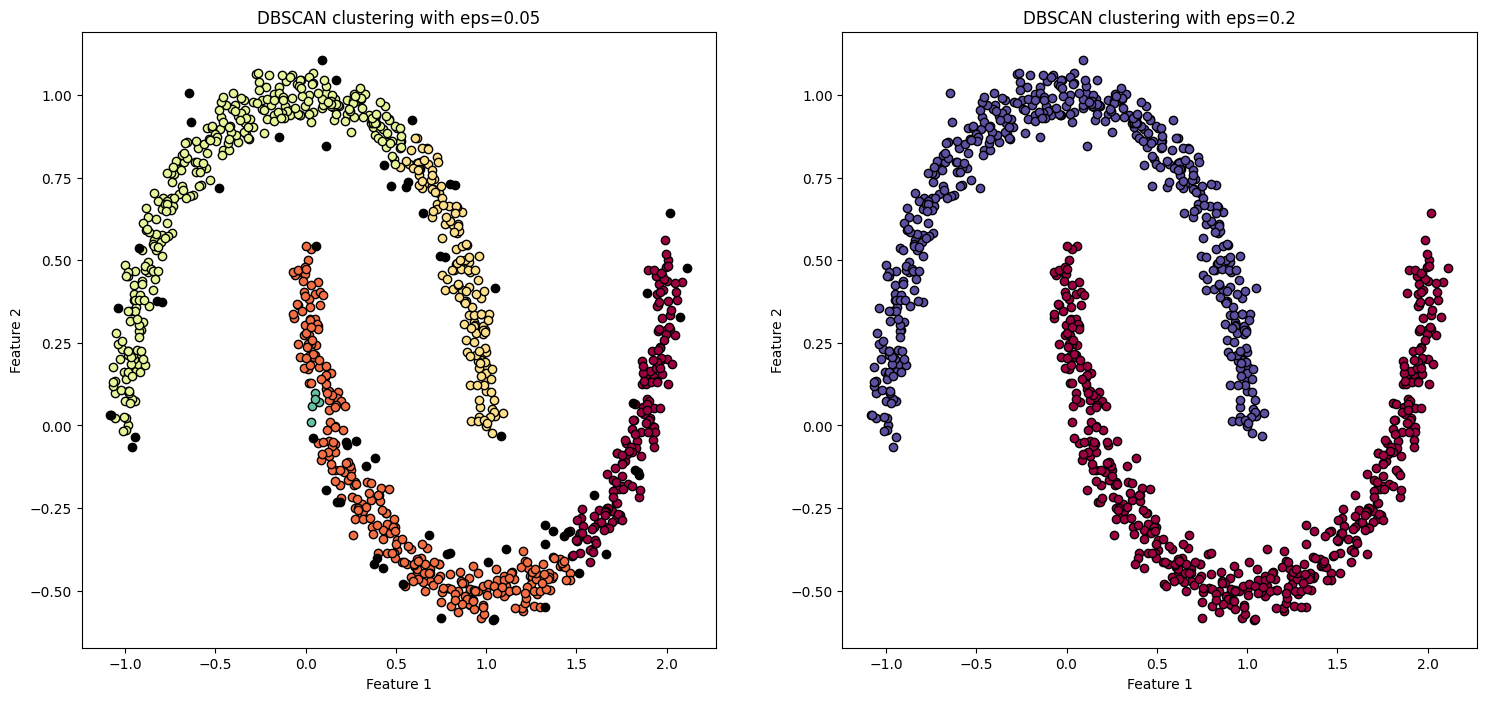

In [34]:

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.05)

# Apply DBSCAN with two different eps values
dbscan1 = DBSCAN(eps=0.05, min_samples=5)
dbscan2 = DBSCAN(eps=0.2, min_samples=5)

dbscan1.fit(X)
dbscan2.fit(X)

# Get the labels
labels1 = dbscan1.labels_
labels2 = dbscan2.labels_

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

unique_labels1 = set(labels1)
unique_labels2 = set(labels2)
colors1 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels1))]
colors2 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels2))]

# Plot for the first DBSCAN result
for k, col in zip(unique_labels1, colors1):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.

    class_member_mask = (labels1 == k)
    xy = X[class_member_mask]
    axes[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

axes[0].set_title('DBSCAN clustering with eps=0.05')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot for the second DBSCAN result
for k, col in zip(unique_labels2, colors2):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.

    class_member_mask = (labels2 == k)
    xy = X[class_member_mask]
    axes[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

axes[1].set_title('DBSCAN clustering with eps=0.2')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.show()

